In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

2024-10-27 21:55:37.639774: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-27 21:55:39.219129: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


For when doing GPU work

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-10-27 21:55:42.791618: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-27 21:55:43.225125: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-27 21:55:43.225182: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.


# **IPPR CNN Model**

### **Setting up Data**

Import image data from dataset containing 20000 positive images and 20000 negative images with each image being 227 x 227 pixels large. Kaggle link: https://www.kaggle.com/datasets/arnavr10880/concrete-crack-images-for-classification/data

In [3]:
data = tf.keras.utils.image_dataset_from_directory('Data', image_size=(227, 227), batch_size=128)

Found 20000 files belonging to 2 classes.


2024-10-27 21:55:46.397774: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-27 21:55:46.397885: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-27 21:55:46.397937: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-27 21:55:47.860720: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-27 21:55:47.860798: I tensorflow/compile

Shuffle the dataset before splitting the data into training, testing and validation sets.

In [4]:
shuffled_data = data.shuffle(buffer_size=100, reshuffle_each_iteration=False)

Splitting the dataset into training, testining and validation sets.

In [5]:
training_split_size = int(len(data)*.7)
testing_split_size = int(len(data)*.15)
validation_split_size = int(len(data)*.15)

In [6]:
training_set = shuffled_data.take(training_split_size)
testing_set = shuffled_data.skip(training_split_size).take(testing_split_size)
validation_set = shuffled_data.skip(training_split_size+testing_split_size).take(validation_split_size)

### **Model Building**

In [7]:
model = Sequential()

model.add(tf.keras.Input(shape=(227,227,3)))
model.add(Conv2D(32, 9, strides = 1, activation = 'relu')) 
model.add(Conv2D(16, 7, strides = 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, 3, strides = 1, activation = 'relu')) 
model.add(Conv2D(16, 3, strides = 1, activation = 'relu')) 
model.add(MaxPooling2D())

model.add(tf.keras.layers.GlobalMaxPooling2D())

model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))




### **Compiling Model**

In [8]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 219, 219, 32)      7808      
                                                                 
 conv2d_1 (Conv2D)           (None, 213, 213, 16)      25104     
                                                                 
 max_pooling2d (MaxPooling2  (None, 106, 106, 16)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 104, 104, 16)      2320      
                                                                 
 conv2d_3 (Conv2D)           (None, 102, 102, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 51, 51, 16)        0         
 g2D)                                                   

In [10]:
hist = model.fit(training_set, epochs = 25, validation_data = validation_set)

Epoch 1/25


2024-10-27 21:56:15.385998: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-10-27 21:56:21.591237: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-10-27 21:56:21.644687: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f8b7d4429d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-27 21:56:21.644742: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2024-10-27 21:56:21.679085: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-27 21:56:21.922964: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

  1/109 [..............................] - ETA: 40:19 - loss: 7.1978 - accuracy: 0.5000

2024-10-27 21:56:33.033292: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.95GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


109/109 [==============================] - 58s 330ms/step - loss: 0.6299 - accuracy: 0.8539 - val_loss: 0.2362 - val_accuracy: 0.8978
Epoch 2/25
109/109 [==============================] - 35s 298ms/step - loss: 0.2539 - accuracy: 0.9019 - val_loss: 0.2598 - val_accuracy: 0.8848
Epoch 3/25
109/109 [==============================] - 36s 303ms/step - loss: 0.2153 - accuracy: 0.9051 - val_loss: 0.1945 - val_accuracy: 0.9112
Epoch 4/25
109/109 [==============================] - 35s 295ms/step - loss: 0.1964 - accuracy: 0.9106 - val_loss: 0.1993 - val_accuracy: 0.9108
Epoch 5/25
109/109 [==============================] - 34s 293ms/step - loss: 0.1831 - accuracy: 0.9146 - val_loss: 0.1836 - val_accuracy: 0.9020
Epoch 6/25
109/109 [==============================] - 35s 300ms/step - loss: 0.1792 - accuracy: 0.9159 - val_loss: 0.1556 - val_accuracy: 0.9256
Epoch 7/25
109/109 [==============================] - 36s 302ms/step - loss: 0.1749 - accuracy: 0.9199 - val_loss: 0.1632 - val_accuracy: 0.9

### **Plotting and Presenting Results**

Plotting training and validation loss

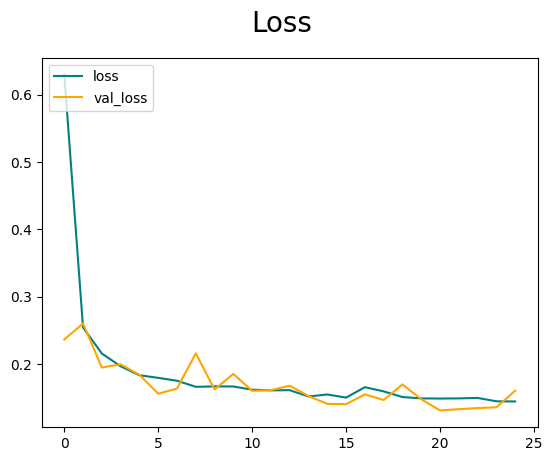

In [11]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle("Loss", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

Plotting training and validation accuracy

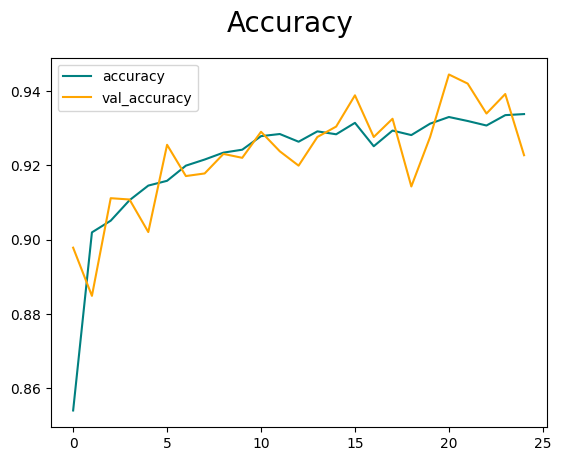

In [12]:
fig2 = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig2.suptitle("Accuracy", fontsize = 20)
plt.legend(loc="upper left")
plt.show()